<a href="https://colab.research.google.com/github/Heity94/01_DataScience_2021/blob/main/TWSM/Class2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Functions

In [1]:
import numpy as np
import pandas as pd
import re

# function for transformation
def transform_df(text):
    (unique, counts) = np.unique(text.split(), return_counts=True)
    df_words = pd.DataFrame(unique, counts).reset_index().rename(columns = {"index":"counts", 0:"word"}).sort_values(by = "counts", ascending = False)
    df_words["rank"] =  df_words["counts"].rank(ascending=False)
    return df_words

def vectorize_sequences(sequences, dimension=10000):
  '''OHE representation of occurrence of every word in a text'''
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
      for j in sequence:
          results[i, j] = 1.
  return results

def tf_sequences(sequences, dimension=10000):
  """"Absolute frequency of every word in a text"""
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
      for j in sequence:
          results[i, j] += 1.
  return results

## Data Sets

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
TWSM_path = "/content/drive/MyDrive/Colab_Notebooks/02_HWR/00_data/SentimentDictionaries/"
bing = pd.read_csv(TWSM_path+"bing.csv")

bing

,Unnamed: 0,word,sentiment
0,1,2-faces,negative
1,2,abnormal,negative
2,3,abolish,negative
3,4,abominable,negative
4,5,abominably,negative
...,...,...,...
6781,6782,zealously,negative
6782,6783,zenith,positive
6783,6784,zest,positive
6784,6785,zippy,positive


## Gutenberg

In [4]:
!pip install gutenberg

from gutenberg.acquire import load_etext
from gutenberg.cleanup import strip_headers

In [5]:
text = strip_headers(load_etext(42671)).strip()
#text = load_etext(42671)
#print(text)

In [6]:
#TWSM_path = "/content/drive/MyDrive/teaching/TWSM/WorkInClass/"
afinn = pd.read_csv(TWSM_path+"afinn.csv")

afinn

,Unnamed: 0,word,value
0,1,abandon,-2
1,2,abandoned,-2
2,3,abandons,-2
3,4,abducted,-2
4,5,abduction,-2
...,...,...,...
2472,2473,yucky,-2
2473,2474,yummy,3
2474,2475,zealot,-2
2475,2476,zealots,-2


In [7]:
dic = afinn

#sentiment_merge = pd.merge(dic, df_words, how="inner", on="word")
#sentiment_merge = pd.merge(dic, df_words, left_on="word", right_on="words")
#sentiment_merge["total_value"] = sentiment_merge["value"] * sentiment_merge["counts"]
#ovr_score = np.mean(sentiment_merge["total_value"])

#print(ovr_score)

## IMD Movie Reviews


***Loading the IMDB dataset***

In [8]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

**Decoding reviews back to text**

In [9]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [10]:
#Decode train set
N=len(train_data)
decoded_reviews = ["" for x in range(N)]

for j in range(N):
  decoded_reviews[j] = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[j]])


In [11]:
#Decode test set
N=len(test_data)
decoded_reviews_test = ["" for x in range(N)]

for j in range(N):
  decoded_reviews_test[j] = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in test_data[j]])

In [12]:
re.findall("robert", decoded_review)

['robert']

### Tasks

Build a classifier on the train data in at least five different ways:

1. using sentiment analysis
2. using term frequencies in at least **4** different flavors.

The data set in 2. is VERY high-dimensional so please choose a classifier that can deal with feature selection.

#### 1. Sentiment analysis

In [13]:
#Load affin sentiment dictonary
affin = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/02_HWR/00_data/SentimentDictionaries/afinn.csv", index_col=0)
affin.head()

,word,value
1,abandon,-2
2,abandoned,-2
3,abandons,-2
4,abducted,-2
5,abduction,-2


In [14]:
# function to create term frequencie matrix
def tf(txt):
  """returns term frequency matrix as df"""
  words, cts = np.unique(txt.split(), return_counts=True)
  i = np.argsort(cts)
  df = pd.DataFrame(np.transpose([words[i[::-1]], cts[i[::-1]]]), columns=["word", "frequency"])
  df["frequency"] = df.frequency.astype("int")
  return df

In [15]:
# Calculate mean sentiment value per review
sent_reviews_train = []

for review in decoded_reviews:

  # create frequency matrix
  matrix = tf(review)

  #merge with affin dictonary
  sent_aff = pd.merge(matrix, affin, left_on="word", right_on="word")

  #calculate sentiment value based on no of occurences
  sent_aff["total_sentiment"] = sent_aff["frequency"]*sent_aff["value"]
  sent_reviews_train.append(sent_aff.total_sentiment.mean())

In [16]:
# Calculate mean sentiment value per review
sent_reviews_test = []

for review in decoded_reviews_test:

  # create frequency matrix
  matrix = tf(review)

  #merge with affin dictonary
  sent_aff = pd.merge(matrix, affin, left_on="word", right_on="word")

  #calculate sentiment value based on no of occurences
  sent_aff["total_sentiment"] = sent_aff["frequency"]*sent_aff["value"]
  sent_reviews_test.append(sent_aff.total_sentiment.mean())

In [17]:
train_df = pd.DataFrame(data={"review": np.array(decoded_reviews).T, "label":np.array(train_labels).T, "ovr_sentiment":np.array(sent_reviews_train).T}).fillna(0)
train_df.head()

test_df = pd.DataFrame(data={"review": np.array(decoded_reviews_test).T, "label":np.array(test_labels).T, "ovr_sentiment":np.array(sent_reviews_test).T}).fillna(0)
test_df.head()

,review,label,ovr_sentiment
0,? please give this one a miss br br ? ? and th...,0,-2.000000
1,? this film requires a lot of patience because...,1,0.842105
2,? many animation buffs consider ? ? the great ...,1,0.741935
3,? i generally love this type of movie however ...,0,-0.800000
4,? like some other people wrote i'm a die hard ...,1,1.384615


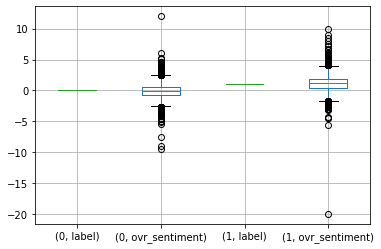

In [18]:
train_df.groupby("label").boxplot("ovr_sentiment")

In [19]:
# train linear model
from sklearn.linear_model import LogisticRegression

y_train = train_df["label"]
X_train = train_df[["ovr_sentiment"]]

y_test = test_df["label"]
X_test = test_df[["ovr_sentiment"]]


lin_reg = LogisticRegression()
lin_reg.fit(X_train, y_train)

LogisticRegression()

In [20]:
baseline_score = lin_reg.score(X_test, y_test) #accuracy
baseline_score

0.728

In [21]:
from sklearn.metrics import confusion_matrix
baseline_cm = confusion_matrix(y_test, lin_reg.predict(X_test))
baseline_cm

array([[9211, 3289],
       [3511, 8989]])

### 2. Using term frequencies in at least 4 different flavors.
- absolute freq. of each word in each review 
- relative tf matrix
- one-hot
- "weighted" tf -> "IDF"

#### Absolute frequency

In [22]:
train_abs = tf_sequences(train_data)
test_abs = tf_sequences(test_data)

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf_abs = RandomForestClassifier()

rf_abs.fit(train_abs, y_train)

acc_abs = rf_abs.score(test_abs, y_test)
print(acc_abs)

abs_cm = confusion_matrix(y_test, rf_abs.predict(test_abs))
print(abs_cm)


0.84836
[[10632  1868]
 [ 1923 10577]]


#### Relative frequency

In [24]:
len_train = np.array([len(review.split()) for review in decoded_reviews])
len_test = np.array([len(review.split()) for review in decoded_reviews_test])

In [25]:
# Divide each item in row by no. of words per review
train_rel = train_abs/len_train[:,None]
test_rel = test_abs/len_test[:,None]

In [26]:
rf_rel = RandomForestClassifier()

rf_rel.fit(train_rel, y_train)

acc_rel = rf_rel.score(test_rel, y_test)
print(acc_rel)

rel_cm = confusion_matrix(y_test, rf_rel.predict(test_rel))
print(rel_cm)


0.84344
[[10604  1896]
 [ 2018 10482]]


#### One-hot encoded

In [ ]:
train_OHE = vectorize_sequences(train_data)
test_OHE = vectorize_sequences(test_data)

In [ ]:
rf_OHE = RandomForestClassifier()

rf_OHE.fit(train_OHE, y_train)

acc_OHE = rf_OHE.score(test_OHE, y_test)
print(acc_OHE)

OHE_cm = confusion_matrix(y_test, rf_OHE.predict(test_OHE))
print(OHE_cm)


#### "Weighted" total frequency = `IDF`

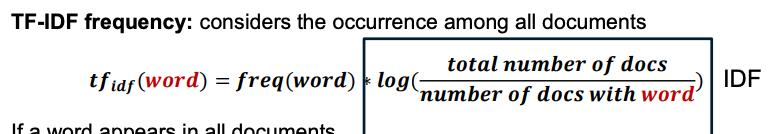

In [ ]:
train_idf = train_abs*np.log(train_abs.shape[0]/np.count_nonzero(train_abs, axis=0))
test_idf = test_abs*np.log(test_abs.shape[0]/np.count_nonzero(test_abs, axis=0))

In [ ]:
rf_idf = RandomForestClassifier()

rf_idf.fit(train_idf, y_train)

acc_idf = rf_idf.score(train_idf, y_test)
print(acc_idf)

idf_cm = confusion_matrix(y_test, rf_idf.predict(test_idf))
print(idf_cm)


## Two-grams task in class

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

bi_gram = CountVectorizer(ngram_range = (2,2))

X_2g = bi_gram.fit_transform(decoded_reviews)

In [ ]:
bigram_col=bi_gram.get_feature_names()

In [ ]:
bigram_nots = []
for i in bigram_col:
  if str.lower(i[:4])=="not ":
    bigram_nots.append(i)

In [ ]:
print(len(bigram_nots))
bigram_nots[:5]

## 20-Newsgroups 

In this exercise, we will be using the 20-Newsgroups dataset. This version of the dataset contains about 11k newsgroups posts from 20 different topics.

In [ ]:
# Import packages
import pandas as pd
import re
from gensim.parsing.preprocessing import STOPWORDS, strip_tags, strip_numeric, strip_punctuation, strip_multiple_whitespaces, remove_stopwords, strip_short, stem_text
import pickle
import en_core_web_sm
import nltk
nltk.download('stopwords')

In [ ]:
from nltk.corpus import stopwords

# 1. Import and examine data

In [ ]:
# Import dataset
df = pd.read_json('https://raw.githubusercontent.com/selva86/datasets/master/newsgroups.json')
df.head()

In [ ]:
# Examine dataset
print('Possible tagret values:')
print(df.target_names.unique())
print(' ')
print('Class distribution:')
print(df.target_names.value_counts())

*The classes are almost uniformly distributed.*


## NLP in spacy


In [ ]:
import spacy
nlp = spacy.load('en')

In [ ]:
doc = nlp(u"Apples and oranges are similar. Boots and hippos aren't.")

for token in doc:
    print(token,  token.lemma_)